In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df11 = pd.read_csv("data_chris/trial_1_group_1.csv")
df12 = pd.read_csv("data_chris/trial_1_group_2.csv")
df21 = pd.read_csv("data_chris/trial_2_group_1.csv")
df22 = pd.read_csv("data_chris/trial_2_group_2.csv")
df31 = pd.read_csv("data_chris/trial_3_group_1.csv")
df32 = pd.read_csv("data_chris/trial_3_group_2.csv")

In [22]:
(df11["N07"] == 11).sum() / len(df11["N01"])

0.5311428571428571

In [23]:
def check_null(series):
    null_percent = (series == 12).sum() / len(series)

In [30]:
def fixation_filter(series, min_length = 12): 
    '''
    min_length = min_fix_duration*fps (12 frame = 0.2 s * 60 fps)
    '''
    list_roi = []
    list_length = []
    current_roi = series[0]
    current_length = 0
    for roi in series:
        if roi == current_roi:
            current_length += 1
        else:
            if current_length >= min_length:
                list_roi.append(current_roi)
                list_length.append(current_length)
                
            current_roi = roi
            current_length = 0
                
    df_res = pd.DataFrame({"roi": list_roi, "duration": list_length})
    return df_res

In [33]:
def merge_consecutive_fixations_in_same_roi(df_fix):
    df_fix['value_grp'] = (df_fix.roi != df_fix.roi.shift()).cumsum()

    return pd.DataFrame({ 'roi': df_fix.groupby('value_grp').roi.first(),
                          'duration' : df_fix.groupby('value_grp').duration.sum()
                         }).reset_index(drop=True)

In [35]:
cols = df11.columns
df_fix = 

Index(['N01', 'N02', 'N03', 'N04', 'N05', 'N06', 'N07', 'N08', 'N09', 'N10',
       'N11', 'N12', 'N13', 'N14', 'N15', 'N16'],
      dtype='object')

In [95]:
merge_consecutive_fixations_in_same_roi(fixation_filter(df11["N01"]))

,roi,duration
0,1,36
1,3,20
2,5,22
3,3,19
4,5,65
...,...,...
76,1,16
77,11,639
78,3,12
79,11,267


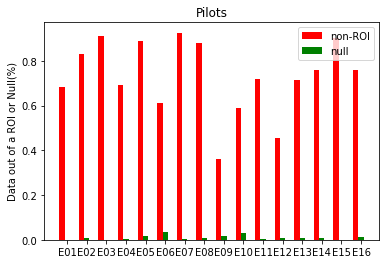

In [104]:
list_col = []
list_non_roi_percentage = []
list_null_percentage = []
df = df12

for col in df.columns:
    df_fix = merge_consecutive_fixations_in_same_roi(fixation_filter(df[col]))
    non_roi_percentage = df_fix[df_fix["roi"] == 11]["duration"].sum()/df_fix["duration"].sum()
    null_percentage = df_fix[df_fix["roi"] == 12]["duration"].sum()/df_fix["duration"].sum()
    
    list_col.append(col)
    list_non_roi_percentage.append(non_roi_percentage)
    list_null_percentage.append(null_percentage)

ind = np.arange(len(list_col))  # the x locations for the groups
width = 0.27
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, list_non_roi_percentage, width, color='r')
rects2 = ax.bar(ind+width, list_null_percentage, width, color='g')

ax.set_ylabel('Data out of a ROI or Null(%)')
ax.set_xticks(ind+width)
ax.set_xticklabels(list_col)
ax.legend((rects1[0], rects2[0]), ('non-ROI', 'null') )
plt.title("Pilots")
plt.show()

In [127]:
list_trial = [1,1,2,2,3,3]

list_group = [1,2,1,2,1,2]
list_avg_dwell_count = []
list_avg_dwell_length = []

list_g1_dwell_count = []
list_g1_dwell_length = []

list_g2_dwell_count = []
list_g2_dwell_length = []

for i, df in enumerate([df11, df12, df21, df22, df31, df32]):
    list_avg_dwell_count_df = []
    list_avg_dwell_length_df = []

    for col in df.columns:
        df_fix = fixation_filter(df[col])
        df_fix = df_fix[(df_fix["roi"] != 11) & (df_fix["roi"] != 12)]
        df_fix = merge_consecutive_fixations_in_same_roi(df_fix)
        print(df_fix)

        avg_dwell_count = df_fix.duration.count()
        avg_dwell_length = df_fix.duration.mean()

        list_avg_dwell_count_df.append(avg_dwell_count)
        list_avg_dwell_length_df.append(avg_dwell_length)
        
    if i%2 == 0: #g1
        list_g1_dwell_count.extend(list_avg_dwell_count_df)
        list_g1_dwell_length.extend(list_avg_dwell_length_df)
    else:
        list_g2_dwell_count.extend(list_avg_dwell_count_df)
        list_g2_dwell_length.extend(list_avg_dwell_length_df)
        
    list_avg_dwell_count.append(np.mean(list_avg_dwell_count_df))
    list_avg_dwell_length.append(np.mean(list_avg_dwell_length_df))
df_dwell = pd.DataFrame({"trial":list_trial, "group":list_group, "dwell_count": list_avg_dwell_count, "dwell_duration": list_avg_dwell_length})

    roi  duration
0     1        36
1     3        20
2     5        22
3     3        19
4     5        65
5     1        57
6     2        12
7     1        13
8     7        12
9     1       100
10    3        25
11    1        28
12    7        51
13    3        22
14    1        57
15    3        24
16    1        91
17    2        16
18    1        53
19    3        16
20    1        51
21    3        13
22    1        42
23    3        12
24    1        13
25    4        12
26    1        87
27    7        31
28    1       269
29    3        12
    roi  duration
0     4       112
1     2        73
2     1        64
3     4        41
4     7        29
5     2        49
6     7        31
7     3        19
8     2        21
9     3        67
10    7        33
11    2        14
12    1       130
13    7        21
14    3        12
15    1        31
16    3        17
17    1       130
18    3        22
19    1        81
20    2       102
21    1        67
22    3        12
23    1   

26    2        22
    roi  duration
0     3        40
1     1        12
2     5        22
3     3        12
4     5        32
..  ...       ...
77    8        15
78    3        15
79    8        81
80    1        14
81    8        16

[82 rows x 2 columns]
    roi  duration
0     4        16
1     3        48
2     8        19
3     4        14
4     3        27
5     2        47
6     3        14
7     7        36
8     8       160
9     1        60
10    2        21
11    1        33
12    3        15
13    1        18
14    8        23
15    1        14
16    7        23
17    8        69
18    1        34
19    7        33
20    1        31
21    7       124
22    8        76
23    7        12
24    8       208
25    7        32
26    8        74
27    7        57
28    8        35
29    7        23
30    4        27
31    1        13
32    8        44
33    1        14
34    4        16
35    1        53
36    2        12
37    7        59
38    4        26
39    1        15
40   

    roi  duration
0     8       141
1     2        13
2     8        93
3     3        12
4     8       211
..  ...       ...
78    8        48
79    2        29
80    8       135
81    2        22
82    8        65

[83 rows x 2 columns]
    roi  duration
0     1        19
1     8        34
2     1        44
3     8       131
4     1        14
..  ...       ...
77    1        49
78    3        12
79    8       195
80    1        21
81    8        15

[82 rows x 2 columns]
    roi  duration
0     7        13
1     8        22
2     1        35
3     7        38
4     8        20
..  ...       ...
71    8        12
72    7        23
73    1        46
74    7        23
75    1        22

[76 rows x 2 columns]
    roi  duration
0     1        39
1     3        22
2     8        83
3     1        31
4     3        13
..  ...       ...
78    1        14
79    2        14
80    8        28
81    1        27
82    8        20

[83 rows x 2 columns]
    roi  duration
0     2        20
1     8 

     roi  duration
0      8        28
1      1        22
2      8        14
3      1        17
4      8        13
..   ...       ...
116    8        55
117    3        17
118    2        24
119    3        14
120    8       129

[121 rows x 2 columns]
    roi  duration
0     2        53
1     7        29
2     2        13
3     8       177
4     1        19
5     2        66
6     4        53
7     9        82
8     2        14
9     4        16
10    2        34
11    9        26
12    8        22
13    4        35
14    8        86
15    1        17
16    8        61
17    1        13
18    8        13
19    1        25
20    3        13
21    8        74
22    1        21
23    8        43
24    2        18
25    8        16
26    9        12
27    7        12
28    1        12
29    8        62
30    1        40
31   10        13
32    8        14
33    1        16
34    2       117
35    1        14
36    2        40
37    8       135
38    2        19
39    7        53
40    8   

Text(0.5, 1.0, 'average dwell count')

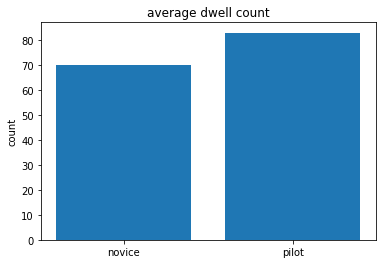

In [128]:
plt.bar([0,1],[np.mean(list_g1_dwell_count),np.mean(list_g2_dwell_count)])
plt.ylabel("count")
plt.xticks([0, 1],["novice", "pilot"])
plt.title("average dwell count")

Text(0.5, 1.0, 'average dwell length')

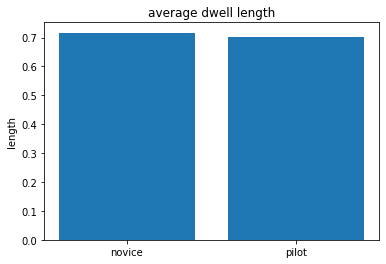

In [129]:
plt.bar([0,1],[np.mean(list_g1_dwell_length)/60,np.mean(list_g2_dwell_length)/60])
plt.ylabel("length")
plt.xticks([0, 1],["novice", "pilot"])
plt.title("average dwell length")

In [130]:
from scipy import stats

l, pl = stats.levene(list_g1_dwell_count, list_g2_dwell_count)
f, p = stats.ttest_ind(list_g1_dwell_count, list_g2_dwell_count)
print("Levene:", l, pl)
print("T-test:", f, p)

Levene: 2.3369304997974294 0.12969650085508205
T-test: -1.6293725374009078 0.10658098517100677


In [131]:
l, pl = stats.levene(list_g1_dwell_length, list_g2_dwell_length)
f, p = stats.ttest_ind(list_g1_dwell_length, list_g2_dwell_length)
print("Levene:",l, pl)
print("T-test:",f, p)

Levene: 2.0358643834045353 0.15694004302293618
T-test: 0.35093357438310796 0.7264234717620635


In [49]:
df_fix = merge_consecutive_fixations_in_same_roi(fixation_filter(df11["N03"]))

In [50]:
df_fix[df_fix["roi"] == 11]["duration"].sum()/df_fix["duration"].sum()

0.929098552078468

In [38]:
def create_transition_matrix(transitions):
    m = pd.crosstab(pd.Series(list(transitions)[1:], name = "t+1"),
            pd.Series(list(transitions)[:-1], name = "t"),normalize=1)
        
    return m

In [42]:
create_transition_matrix(df_fix.roi.values)

t,1,2,3,4,7,11,12
t+1,,,,,,,
1,0.000000,0.181818,0.250,0.0,0.0,0.485714,0.0
2,0.047619,0.000000,0.125,0.5,0.2,0.200000,0.0
3,0.095238,0.090909,0.000,0.0,0.4,0.085714,0.0
4,0.000000,0.000000,0.000,0.0,0.0,0.057143,0.0
7,0.000000,0.000000,0.000,0.5,0.0,0.114286,0.0
11,0.809524,0.727273,0.625,0.0,0.4,0.000000,1.0
12,0.047619,0.000000,0.000,0.0,0.0,0.057143,0.0
